downsampling: reduce image by factor of 4, eg from 16x16 to 4x4

vectorize images to matrixes and perform PCA to find the eigenvectors U and largest eigen values lambda for k number of eigen values

find different "eigenfaces" through principle components:
z = W^T(x-u)/(lambda)^1/2

# Part 2a

1. import all the 10 images of Subject 1 (S1)

2. downsample by a factor of 4 

3. Reshape ( vectorize the data matrix)

3. The dimension of the  S1 is ~(10,4800) 

3. take the mean (M) of all the 10 images. ~(1,4800).

4. Subtract the mean from all the 10  images.  ie. centering X1=S1-M

5. Perform SVD or find the covariance. ( You may need to transpose for SVD)

if using SVD:

7. Find the  eigenvectors corresponding to the 6 largest eigenvalues

8. These are the 6 eigenfaces. Reshape to get the images. 

if using covariance: 

7. Find the  eigenvectors corresponding to the 6 largest eigenvalues

8. Find Z for the 6 eigenvectors( as described in lectures). These are the 6 eigenfaces

9. Reshape to get the images

Repeat the steps for Subject 2

You will get 6 eigenfaces for Subject 1 and 6 eigenfaces for Subject 2



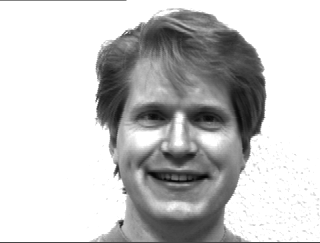

In [1]:
#Load an image
from PIL import Image
import math
import numpy as np

dir = r"yalefaces/Subject_1/"
fileName = dir + "subject01.happy.gif"
img = Image.open(fileName)

display(img)

In [2]:
# utility functions:

def proceed():
    import sys
    x = input('to continue enter 3: ')
    if(x == "3"):
        pass
    else:
        print('\nProcess terminated by user\n')
        sys.exit(0)
    
def image_grid(D,H,W,cols=10,scale=1):
    n = np.shape(D)[0]
    rows = int(math.ceil((n+0.0)/cols))
    fig = plt.figure(1,figsize=[scale*20.0/H*W,scale*20.0/cols*rows],dpi=300)   
    for i in range(n):
        plt.subplot(rows,cols,i+1)
        fig = plt.imshow(np.reshape(D[i,:],[H,W]), cmap = plt.get_cmap("gray"))
        #display(fig = plt.imshow(np.reshape(D[i,:],[H,W]), cmap = plt.get_cmap("gray")))
        plt.axis('off')
        plt.show()
    plt.close()    

def create_filenames(data_dir):
    dir_list = os.listdir(data_dir)
    return(dir_list)


len(file_list):  10 

display file names:
subject01.happy.gif
subject01.rightlight.gif
subject01.noglasses.gif
subject01.sad.gif
subject01.surprised.gif
subject01.glasses.gif
subject01.normal.gif
subject01.wink.gif
subject01.sleepy.gif
subject01.leftlight.gif

to continue enter 3: 3
shape of file  yalefaces/Subject_1/subject01.noglasses.gif =  (243, 320) 

arr.shape
 (10, 77760)


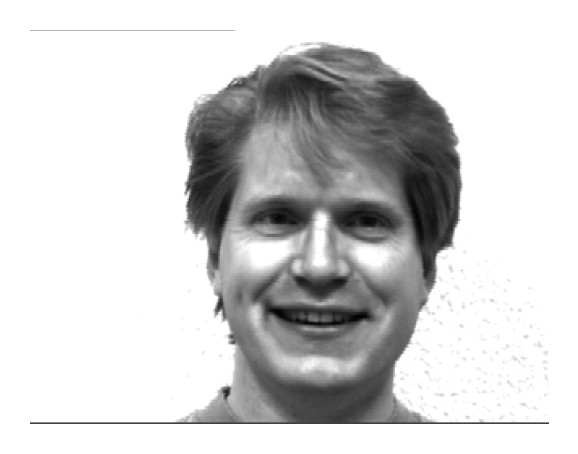

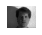

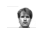

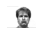

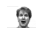

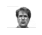

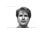

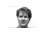

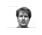

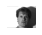

to continue enter 3: 3
originalShape (243, 320)
arrSingleImage: 
 [[130 130 130 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 249 255 255]
 [255 255 255 ... 255 255 255]
 [ 68  68  68 ...  68  68  68]] 

to continue enter 3: 3
dsvector.shape (61, 80)
dsvector
 [[130 130 130 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 244 253]] 

to continue enter 3: 3


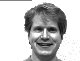

shape of downsampled image  (61, 80) 

i:  0
i:  1
i:  2
i:  3
i:  4
i:  5
i:  6
i:  7
i:  8
i:  9


In [3]:
#initializing/setting up data
import os
import matplotlib.pyplot as plt

view_list = ['P00A+000E+00', 'P00A+005E+10' , 'P00A+005E-10' , 'P00A+010E+00']

fileList = create_filenames(dir);

print('len(file_list): ', len(fileList), '\n')

print('display file names:')
for file in fileList:  
     print(file)
print()        
proceed()


im = Image.open(dir + fileList[2]).convert("L")

H,W = np.shape(im)
print ('shape of file ', dir + fileList[2], '= ', (H, W), '\n')

arr = np.zeros([len(fileList), H*W]) 
print("arr.shape\n",arr.shape)

for i in range(len(fileList)):
    im = Image.open(dir + fileList[i]).convert("L")
    arr[i,:] = np.reshape(np.asarray(im),[1,H*W])

image_grid(arr,H,W)

proceed()

img = Image.open(dir + fileList[0]).convert('L')
arrSingleImage = np.array(img)

# record the original shape
originalShape = arrSingleImage.shape
print("originalShape", originalShape)
print("arrSingleImage: \n", arrSingleImage, '\n')
proceed()

dsvector = arrSingleImage[::4,::4]

print("dsvector.shape", dsvector.shape)
print("dsvector\n",dsvector, "\n")
proceed()

arr3 = np.asarray(dsvector)
# make a PIL image
#img2 = Image.fromarray(arr3, 'RGBA')
img2 = Image.fromarray(arr3, 'L')
#img2 = Image.fromarray(arr2, 'L') 
display(img2)

H,W = np.shape(img2)
print ('shape of downsampled image ', (H, W), '\n')

arr = np.zeros([len(fileList), H*W]) 

for i in range(len(fileList)):
    print('i: ', i)
    im = Image.open(dir + fileList[i]).convert("L")
    arrSingleImage = np.array(im)
    dsvector = arrSingleImage[::4,::4]
    H,W = np.shape(dsvector)
    arr[i,:] = np.reshape(np.asarray(dsvector),[1,H*W])
 

## Subject 1

### Subject 1 Mean Image

mean_image.shape 
 (4880,)


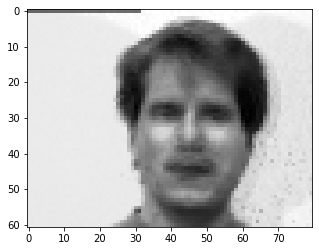



cell process complete




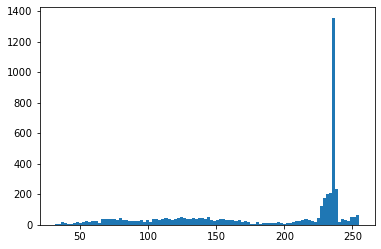

In [4]:
mean_image = np.mean(arr, axis=0)
#display(mean_image)
print("mean_image.shape \n", mean_image.shape)

plt.imshow(np.reshape(mean_image,[H,W]), cmap = plt.get_cmap("gray"))
plt.show()
plt.close()

plt.figure()
plt.hist(mean_image,bins=100);  #  heavily skewed to the right; is this correct ????????????????????????

print('\n\ncell process complete\n\n')

### Subject 1 Normalize

10
arr.shape 
 (10, 4880)
mean_image.shape 
 (4880,)
arr_normalize.shape =  (10, 4880)


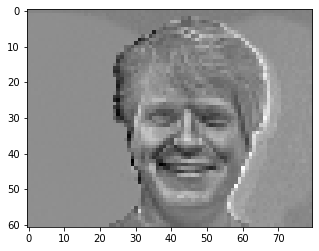

Normalized Faces:


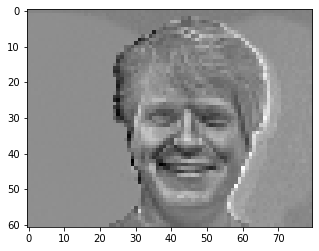

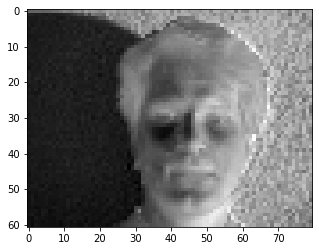

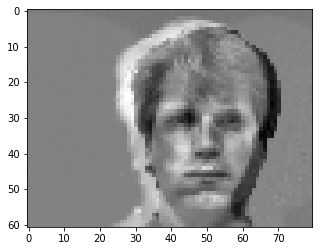

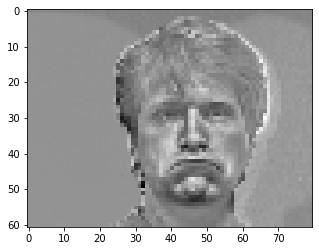

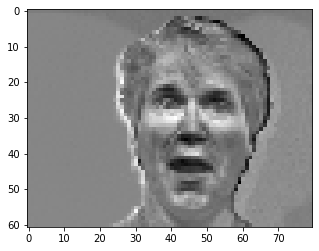

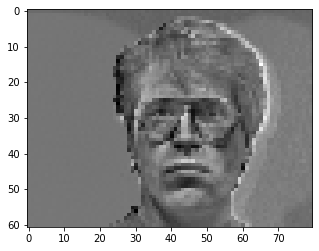

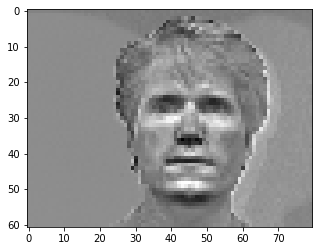

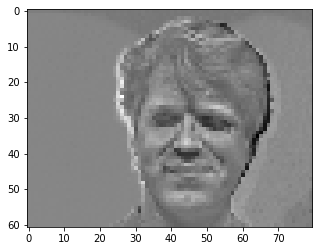

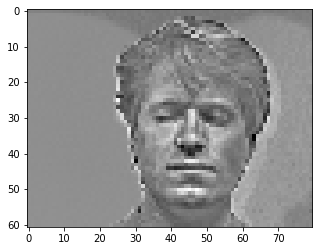

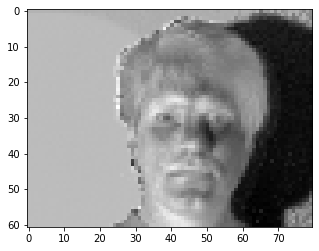






cell process complete




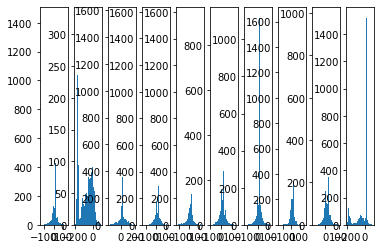

In [5]:
#SUBJECT 1 NORMALIZE
print(len(fileList))
number = 10
# arr_normalize = np.zeros([len(fileList), H*W])
arr_normalize = np.zeros([number, H*W])
#arr_normalize = arr[0:10,:] - mean_image
print("arr.shape \n", arr.shape)
print("mean_image.shape \n", mean_image.shape)
arr_normalize = arr - mean_image
print("arr_normalize.shape = ", arr_normalize.shape)

plt.imshow(np.reshape(arr_normalize[0],[H,W]), cmap = plt.get_cmap("gray")) #
plt.show()

print("Normalized Faces:")
for i in range(number):
    plt.imshow(np.reshape(arr_normalize[i],[H,W]), cmap = plt.get_cmap("gray")) #
    plt.show()

#plt.hist(np.reshape(mean_image,[H,W]),bins=100);

plt.close()
plt.figure()
plt.hist(arr_normalize[0], bins=100);
#plt.hist(np.reshape(arr_normalize[0],[H,W]), bins=100);

#plt.hist(np.reshape(arr_normalize[0],[H,W]),bins=100);

for i in range(number):
    plt.subplot(1,10,i+1)
    #fig, ax = plt.subplots(1,10,i+1))
    #ax.set_xlim(left[0], right[-1])
    plt.hist(arr_normalize[i], bins=100 );
print('\n\n')    

#image_grid(arr_normalize[:10,:],H,W)

print('\n\ncell process complete\n\n')


In [6]:
#PCA FUNCTION USING SVD

def pca(X, n_pc):
    n_samples, n_features = X.shape
    mean = np.mean(X, axis=0)
    centered_data = X-mean
    U, S, V = np.linalg.svd(centered_data)
    components = V[:n_pc]
    projected = U[:,:n_pc]*S[:n_pc]
    
    return projected, components, mean, centered_data

In [7]:
#SVD APPLICATION

pca(arr, 6)

(array([[-7.70911518e+02, -8.39781323e+02,  7.13698909e+02,
          8.96652496e+02, -3.86861172e+02,  6.91960202e+02],
        [ 7.58939515e+03, -1.16744642e+03, -2.72661499e+02,
         -5.64630883e+01, -1.10175700e-01, -2.00712825e+01],
        [-1.37270080e+03,  3.02214457e+02, -3.25908232e+03,
          3.07004178e+02,  2.96544088e+02,  7.14458225e+01],
        [-9.76598046e+02, -8.28768735e+02,  5.95968939e+02,
          3.49863202e+02,  5.46654324e+02, -7.71350020e+02],
        [-1.12411206e+03, -5.16630860e+02,  8.27123425e+01,
         -1.77604950e+03, -8.04660225e+01,  4.44868589e+02],
        [-9.07277609e+02, -8.77218248e+02,  6.45117864e+02,
          7.41321909e+02,  1.36113796e+02,  4.88281355e+02],
        [-1.03214679e+03, -8.64902037e+02,  7.01364973e+02,
         -3.71523595e+02,  1.06769036e+03, -2.24234570e+01],
        [-1.08154348e+03, -4.36353757e+02, -1.47300324e+02,
         -1.76091175e+02, -1.30304576e+03, -3.84555936e+02],
        [-1.05923599e+03, -6.872

In [8]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(arr_normalize)

PCA()

### Subject 1 Eigenfaces

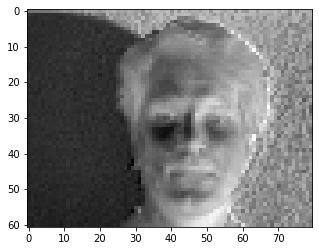

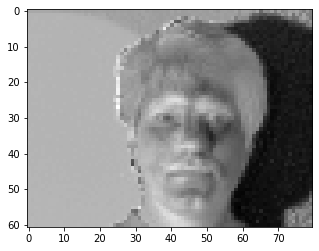

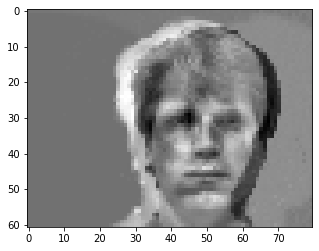

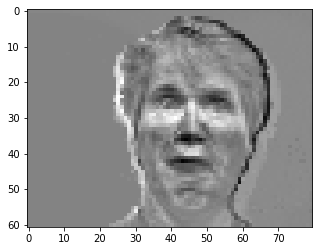

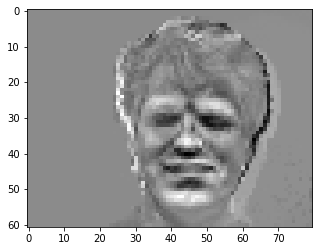

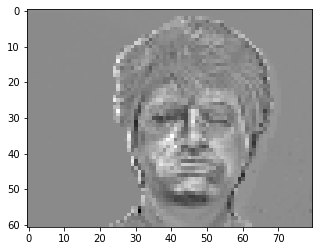

eigenfaces.shape=  (10, 4880)


In [9]:
#EIGENFACES
eigenfaces = pca.components_

for i in range(6):
    plt.imshow(np.reshape(eigenfaces[i],[H,W]), cmap = plt.get_cmap("gray")) #
    plt.show()
    
print("eigenfaces.shape= ", eigenfaces.shape)

## Subject 2

len(file_list):  9 

display file names:
subject02.glasses.gif
subject02.noglasses.gif
subject02.wink.gif
subject02.sad.gif
subject02.sleepy.gif
subject02.rightlight.gif
subject02.normal.gif
subject02.happy.gif
subject02.leftlight.gif

to continue enter 3: 3


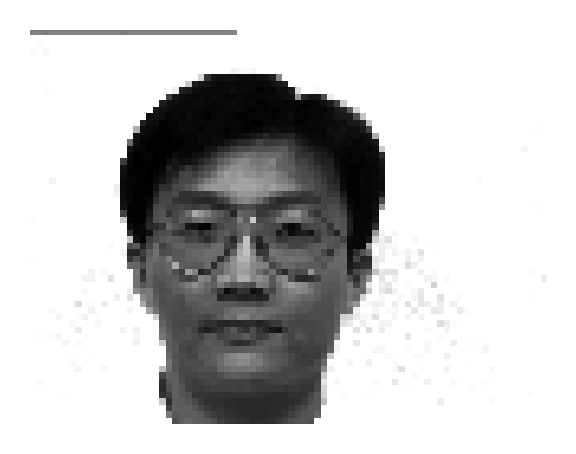

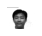

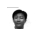

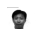

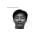

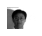

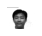

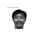

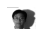

In [10]:
#SUBJECT 2 LOAD AND DOWNSIZE
dir2 = r"/Users/Sean/Downloads/PCA_demo_code_v2/yalefaces/Subject_2//"
fileList2 = create_filenames(dir2)
print('len(file_list): ', len(fileList2), '\n')
print('display file names:')
for file in fileList2:  
     print(file)
print()        
proceed()

arr2 = np.zeros([len(fileList2), H*W])   # array of all images of subject 1 except the test image

for i in range(len(fileList2)):
    im = Image.open(dir2 + fileList2[i]).convert("L")
    arrSingleImage = np.array(im)
    dsvector2 = arrSingleImage[::4,::4]
    H,W = np.shape(dsvector2)
    arr2[i,:] = np.reshape(np.asarray(dsvector2),[1,H*W])

image_grid(arr2,H,W)

### Subject 2 Mean and Normalized

mean_image2.shape=  (4880,)


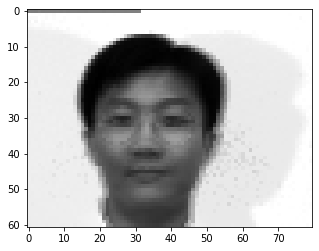

len(fileList2) =  9
arr.shape 
 (9, 4880)
mean_image.shape 
 (4880,)
arr_normalize.shape =  (9, 4880)


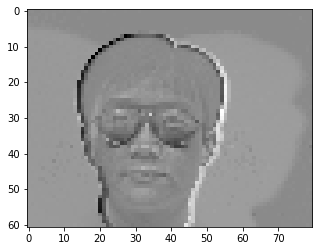

Normalized Faces:


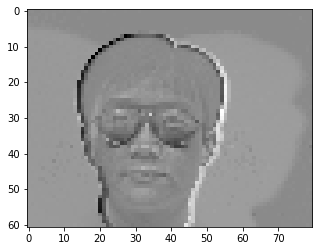

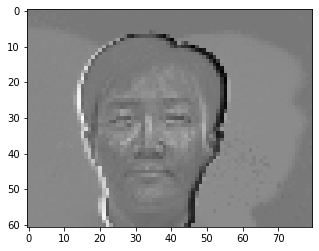

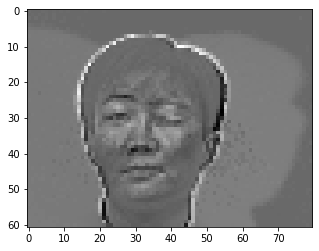

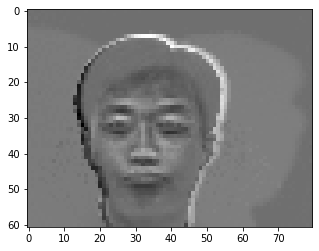

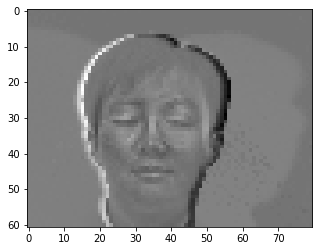

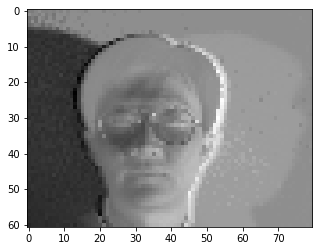

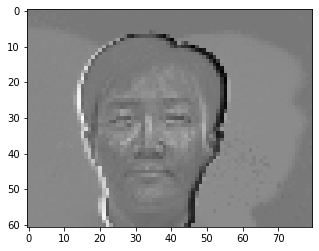

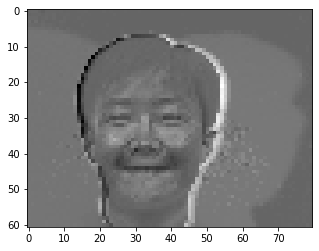

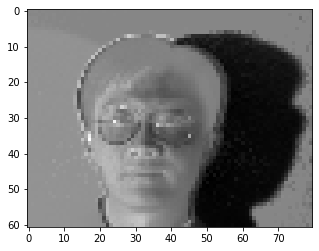

In [11]:
#SUBJECT 2 MEAN IMAGE AND NORMALIZING
mean_image2 = np.mean(arr2, axis=0)
print("mean_image2.shape= ", mean_image2.shape)
plt.imshow(np.reshape(mean_image2,[H,W]), cmap = plt.get_cmap("gray"))
plt.show()
plt.close()

print("len(fileList2) = ", len(fileList2))
# arr_normalize = np.zeros([len(fileList), H*W])
arr2_normalize = np.zeros([len(fileList2), H*W])
#arr_normalize = arr[0:10,:] - mean_image
print("arr.shape \n", arr2.shape)
print("mean_image.shape \n", mean_image2.shape)
arr2_normalize = arr2 - mean_image2
print("arr_normalize.shape = ", arr2_normalize.shape)

plt.imshow(np.reshape(arr2_normalize[0],[H,W]), cmap = plt.get_cmap("gray")) #
plt.show()

print("Normalized Faces:")
for i in range(len(fileList2)):
    plt.imshow(np.reshape(arr2_normalize[i],[H,W]), cmap = plt.get_cmap("gray")) #
    plt.show()

### Subject 2 Eigenfaces

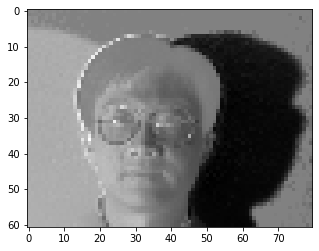

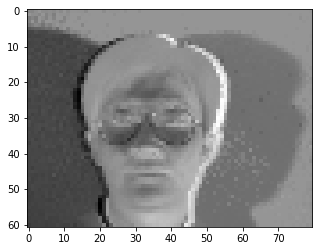

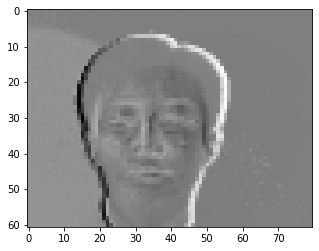

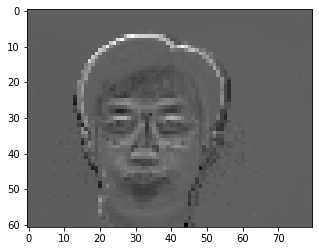

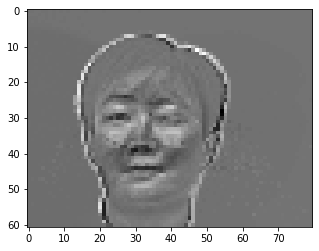

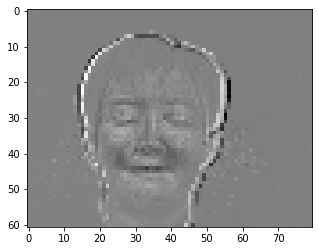

eigenfaces2.shape=  (9, 4880)


In [12]:
#SUBJECT 2 EIGENFACES
pca2 = PCA()
pca2.fit(arr2_normalize)
eigenfaces2 = pca2.components_

for i in range(6):
    plt.imshow(np.reshape(eigenfaces2[i],[H,W]), cmap = plt.get_cmap("gray")) #
    plt.show()
    
print("eigenfaces2.shape= ", eigenfaces2.shape)

### For both Subject 1 and Subject 2, the eigenfaces are ordered in descending image contrast, lighting, shape, and position. This is evident from the images with the left and right light as the first two eigenfaces for both subjects.  This is the basis of feature recognition to be able to identify distinct characteristics of an individual's face/images.

# Part 2b

import the test images and downsample and reshape as above. 

For Subject 1 

Test image t1=Test image(subject1) -M    (<-- this is normalized?)

For Subject 2: 

Test image t2=Test image(Subject2) -M    (<-- this is normalized?)

Residual Distance

S11= | ( testimage(subject1)  - eigenface(subject1) x eigenface(subject1).T x testimage(subhect 1)|^2 ( some transposing may be needed to get the right matching dimensions)

S12= | ( testimage(subject2) .T - eigenface(subejct1) x eigenface(subject1).T x testimage(subject 2)|^2

You may use any number of eigenfaces( 1 to 6)  for part 2. 

You do the same for S21 and S22

Please note the residuals calculated from the covariance approach may be in range 10^15-10^17

The residuals calculated from the SVD approach may be in the range 10^6-10^9

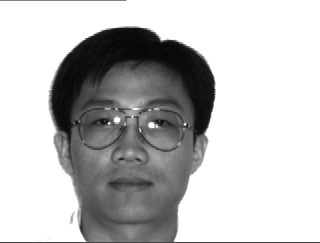

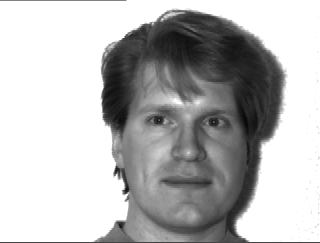

len(file_list):  2 

display file names:
subject02-test.gif
subject01-test.gif

to continue enter 3: 3
i:  0
arr[i].shape:  (4880,)
arr[i]= [130. 130. 130. ... 255. 255. 255.]


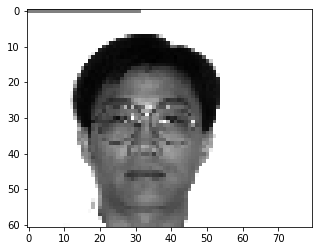

i:  1
arr[i].shape:  (4880,)
arr[i]= [130. 130. 130. ... 255. 255. 255.]


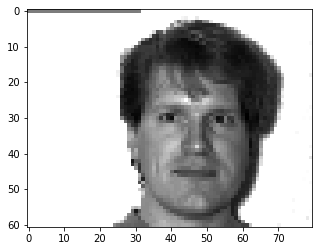

In [13]:
#Downsample Subject 1 and 2

Subject2 = Image.open("yalefaces/testfaces/subject02-test.gif").convert("L")
Subject1 = Image.open("yalefaces/testfaces/subject01-test.gif").convert("L")
display(Subject2)
display(Subject1)

dir3 = r"yalefaces/testfaces//"
fileList3 = create_filenames(dir3)

print('len(file_list): ', len(fileList3), '\n')

print('display file names:')
for file in fileList3:  
     print(file)
print()        
proceed()

arr3 = np.zeros([len(fileList3), H*W])
for i in range(len(fileList3)):
    print('i: ', i)
    im = Image.open(dir3 + fileList3[i]).convert("L")
    arrSingleImage3 = np.array(im)
    dsvector3 = arrSingleImage3[::4,::4]
    H,W = np.shape(dsvector3)
    #display(im)
    #arr[i,:] = np.reshape(np.asarray(im),[1,H*W]) # ValueError: cannot reshape array of size 77760 into shape (1,4880)
    arr3[i,:] = np.reshape(np.asarray(dsvector3),[1,H*W])
    print('arr[i].shape: ', arr3[1].shape)
    print("arr[i]=",arr3[i])
    plt.imshow(np.reshape(arr3[i],[H,W]), cmap = plt.get_cmap("gray")) #
    plt.show()


H,W =  61 80
normalize_test_imagett1.shape=  (1, 4880)
mean_image.shape = (4880,)
normalize_test_imaget1.shape=  (4880,)

 Test_Image_T1:


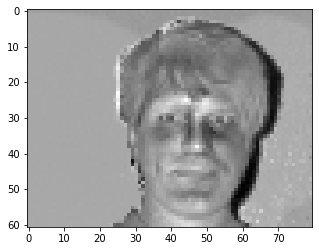

normalize_test_imaget2.shape=  (1, 4880)
mean_image2.shape = (4880,)
normalize_test_imaget2.shape=  (4880,)

 Test_Image_T2:


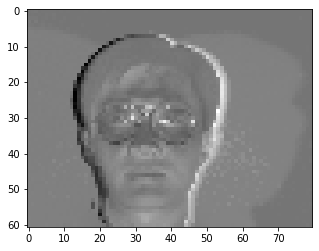

In [14]:
#NORMALIZE TESTIMAGES

#Test Image 1
print("H,W = ", H, W)
normalize_test_imaget1 = np.zeros([1, H*W])
print("normalize_test_imagett1.shape= ", normalize_test_imaget1.shape)
print("mean_image.shape =", mean_image.shape)
#arr_normalize = arr[0:10,:] - mean_image
normalize_test_imaget1 = arr3[1] - mean_image
print("normalize_test_imaget1.shape= ", normalize_test_imaget1.shape)

print("\n Test_Image_T1:")
plt.imshow(np.reshape(normalize_test_imaget1,[H,W]), cmap = plt.get_cmap("gray")) #
plt.show()

#Test Image 2
normalize_test_imaget2 = np.zeros([1, H*W])
print("normalize_test_imaget2.shape= ", normalize_test_imaget2.shape)
print("mean_image2.shape =", mean_image2.shape)
#arr_normalize = arr[0:10,:] - mean_image
normalize_test_imaget2 = arr3[0] - mean_image2
print("normalize_test_imaget2.shape= ", normalize_test_imaget2.shape)

print("\n Test_Image_T2:")
plt.imshow(np.reshape(normalize_test_imaget2,[H,W]), cmap = plt.get_cmap("gray")) #
plt.show()


In [15]:
#RESIDUAL DISTANCE, S11

#S11= | ( testimage(subject1)  - eigenface(subject1) x eigenface(subject1).T x testimage(subhect 1)|^2 ( some transposing may be needed to get the right matching dimensions)
#S12= | ( testimage(subject2)  - eigenface(subejct1) x eigenface(subject1).T x testimage(subject 2)|^2

normalize_test_imaget1 = np.reshape(normalize_test_imaget1,[4880,1])
eigenfaces1top = eigenfaces[0]
eigenfaces1top = np.reshape(eigenfaces1top,[4880,1])
print("normalize_test_image1t.shape= ", normalize_test_imaget1.shape)
print("eigenfaces1top.shape= ", eigenfaces1top.shape)
print("eigenfaces1top.T.shape=", eigenfaces1top.T.shape)

print("np.dot(eigenfaces1top, eigenfaces1top.T)", np.dot(eigenfaces1top, eigenfaces1top.T).shape)

S11 = np.sum((normalize_test_imaget1 - np.dot((np.dot(eigenfaces1top, eigenfaces1top.T)),normalize_test_imaget1))**2)
#S11 = np.sum((normalize_test_imaget1 - eigenfaces1 @ eigenfaces1.T @ normalize_test_imaget1)**2) #<<<< this also works
print("S11: ", S11)

eigenfaces2top = eigenfaces2[0]

normalize_test_image1t.shape=  (4880, 1)
eigenfaces1top.shape=  (4880, 1)
eigenfaces1top.T.shape= (1, 4880)
np.dot(eigenfaces1top, eigenfaces1top.T) (4880, 4880)
S11:  7201612.087076735


In [16]:
#RESIDUAL DISTANCE FUNCTION, (NEED HELP EDITING FUNCTION)!!!!!!!!!!!!!!!!!!!!!!!!!!!

def residual_distance(testimageS1, testimageS2, eigenfacesS1, eigenfacesS2):
    testimageS1 = np.reshape(testimageS1,[4880,1])
    testimageS1 = np.reshape(testimageS1,[4880,1])
    
    eigenfaces1top = eigenfacesS1[0]
    eigenfaces1top = np.reshape(eigenfaces1top,[4880,1])
    ResDist = np.sum((testimageS1 - np.dot((np.dot(eigenfaces1top, eigenfaces1top.T)),testimageS1))**2)
    print("for S==1, J==1: Residual Distance =", ResDist, "\n")
    
    eigenfaces2top = eigenfacesS2[0]
    eigenfaces2top = np.reshape(eigenfaces2top,[4880,1])
    ResDist = np.sum((testimageS1 - np.dot((np.dot(eigenfaces2top, eigenfaces2top.T)),testimageS1))**2)
    print("for S==2, J==1: Residual Distance =", ResDist, "\n")   
    
    eigenfaces2top = eigenfacesS2[0]
    eigenfaces2top = np.reshape(eigenfaces2top,[4880,1])
    ResDist = np.sum((testimageS2 - np.dot((np.dot(eigenfaces2top, eigenfaces2top.T)),testimageS2))**2)
    print("for S==2, J==2: Residual Distance =", ResDist, "\n")
   
    eigenfaces1top = eigenfacesS1[0]
    eigenfaces1top = np.reshape(eigenfaces1top,[4880,1])
    ResDist = np.sum((testimageS2 - np.dot((np.dot(eigenfaces1top, eigenfaces1top.T)),testimageS2))**2)
    print("for S==1, J==2: Residual Distance =", ResDist, "\n")
    

    
residual_distance(normalize_test_imaget1, normalize_test_imaget2, eigenfaces, eigenfaces2)
            

for S==1, J==1: Residual Distance = 7201612.087076735 

for S==2, J==1: Residual Distance = 6304902.427078757 

for S==2, J==2: Residual Distance = 4242539.9084916385 

for S==1, J==2: Residual Distance = 4845168.873500652 



### 2b) 
### My residual distances are 10^6, which is on the lower end of what it should be for the SVD approach. The residual distance is finding the summation of the difference between the subject's test image and the test image scaled by the eigenface identity matrix, which outputs a singular scalar value. Presumably, residual distances that use the same subjects for the test image and the eigenfaces should have smaller values than if there were different subjects used for the eigenfaces and test images, which is close to what I got. From my results, S11>S21 and S22<S12, though I think it should have been S11 < S21

### 2c) 

### Eigenface face recognition can work better if you have a larger pool of images with varying contrasting shades of that individual's face. This woud allow your mean to be a better representation of the subject and not have poor lighting or too much light/exposure impact the facial recognition. Based on this homework, it seemed like lighting had a big influence on the facial recognition. It is a little hard to tell based on just these two subjects how much skin tone, face shape, hair, and other features impact these results. I would be curious to see this homework also performed with more subjects to test those features. 